In [1]:
#import librearies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


import statsmodels.api as sm

In [2]:
rawdata=pd.read_csv('fifa19playerdataset.csv')

In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
rawdata.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
datafifa=rawdata[['Overall','Potential','Agility','Strength','Vision']]

In [7]:
datafifa.describe()

,Overall,Potential,Agility,Strength,Vision
count,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000
mean,66.238699,71.307299,63.503607,65.311967,53.400903
std,6.908930,6.136496,14.766049,12.557000,14.146881
min,46.000000,48.000000,14.000000,17.000000,10.000000
25%,62.000000,67.000000,55.000000,58.000000,44.000000
50%,66.000000,71.000000,66.000000,67.000000,55.000000
75%,71.000000,75.000000,74.000000,74.000000,64.000000
max,94.000000,95.000000,96.000000,97.000000,94.000000


In [8]:
datafifa.head()

,Overall,Potential,Agility,Strength,Vision
0,94,94,91.0,59.0,94.0
1,94,94,87.0,79.0,82.0
2,92,93,96.0,49.0,87.0
3,91,93,60.0,64.0,68.0
4,91,92,79.0,75.0,94.0


In [9]:
datafifa.corr()

,Overall,Potential,Agility,Strength,Vision
Overall,1.000000,0.660939,0.264952,0.349326,0.498894
Potential,0.660939,1.000000,0.222310,0.075769,0.348141
Agility,0.264952,0.222310,1.000000,-0.234199,0.597327
Strength,0.349326,0.075769,-0.234199,1.000000,-0.046929
Vision,0.498894,0.348141,0.597327,-0.046929,1.000000


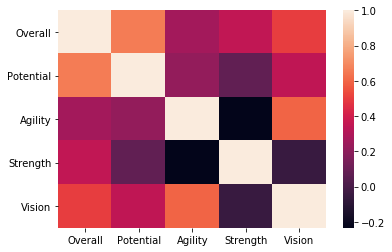

In [13]:
sns.heatmap(datafifa.corr())
plt.show()

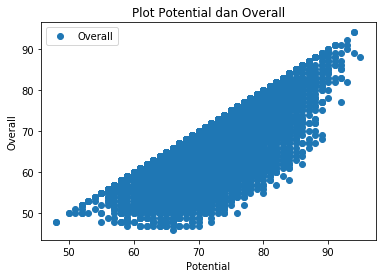

In [14]:
#Plot

datafifa.plot (x='Potential',y='Overall',style='o')
plt.title ('Plot Potential dan Overall')
plt.xlabel ('Potential')
plt.ylabel ('Overall')
plt.show()

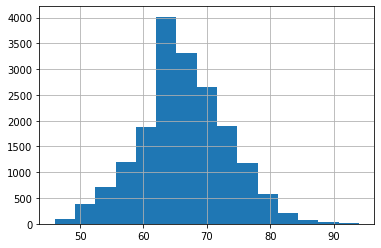

In [15]:
datafifa['Overall'].hist(bins=15)

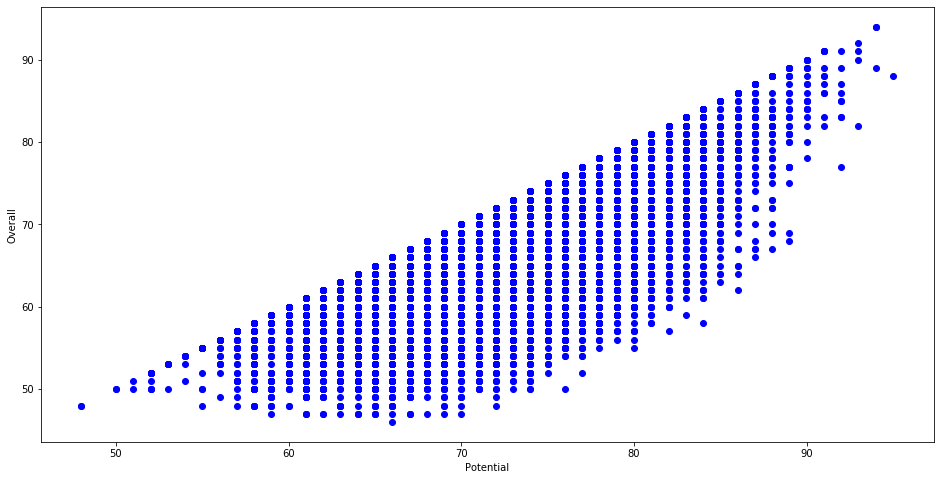

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(
    datafifa['Potential'],
    datafifa['Overall'],
    c='blue')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.show()

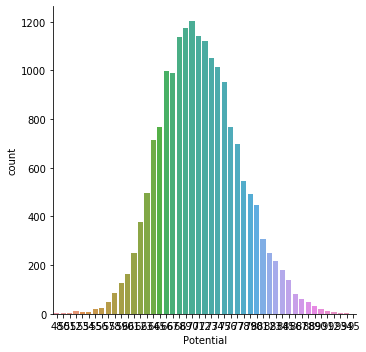

In [17]:
sns.catplot(x='Potential', kind='count', data=datafifa, orient='h')

In [18]:
x = datafifa['Potential'].values.reshape(-1,1)
y = datafifa['Overall'].values.reshape(-1,1)

In [19]:
reg = LinearRegression()
reg.fit(x, y)
print("The linear model is: Overall = {:.5} + {:.5}Potential".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Overall = 13.176 + 0.74413Potential


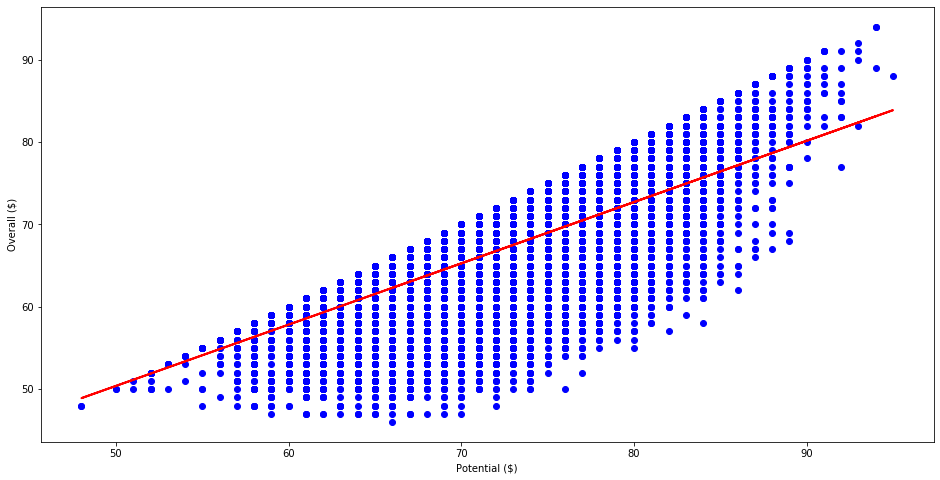

In [20]:
predictions = reg.predict(x)
plt.figure(figsize=(16, 8))
plt.scatter(
    datafifa['Potential'],
    datafifa['Overall'],
    c='blue'
)
plt.plot(
    datafifa['Potential'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("Potential ($)")
plt.ylabel("Overall ($)")
plt.show()

In [21]:
X = datafifa['Potential']
y = datafifa['Overall']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:21:24   Log-Likelihood:                -55798.
No. Observations:               18207   AIC:                         1.116e+05
Df Residuals:                   18205   BIC:                         1.116e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1765      0.448     29.400      0.0